<a href="https://colab.research.google.com/github/Karthikgkamath/Refractive_Index_Prediction/blob/main/germanate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🔹 SVR (Linear)
R² Score       : 0.5192
MAE            : 0.0442
RMSE           : 0.0490


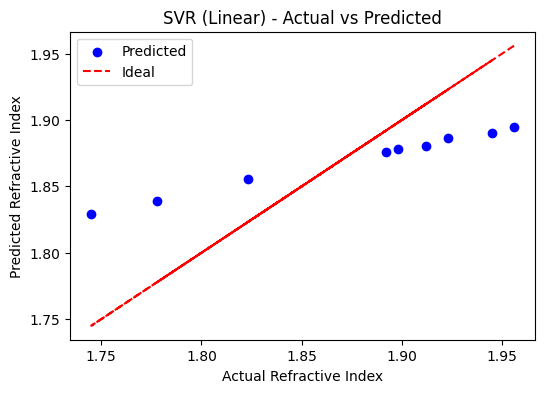


🔹 Polynomial Regression
R² Score       : 0.9786
MAE            : 0.0093
RMSE           : 0.0103


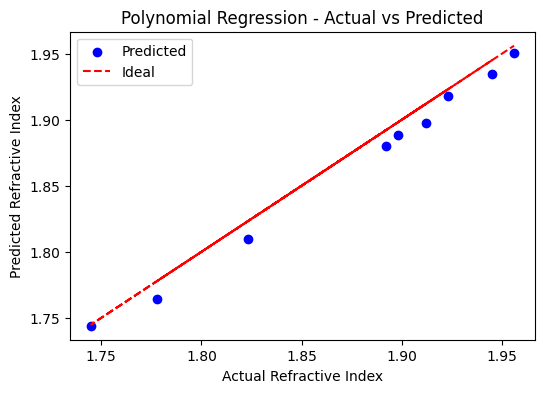


🔹 Extra Trees
R² Score       : 0.9489
MAE            : 0.0126
RMSE           : 0.0160


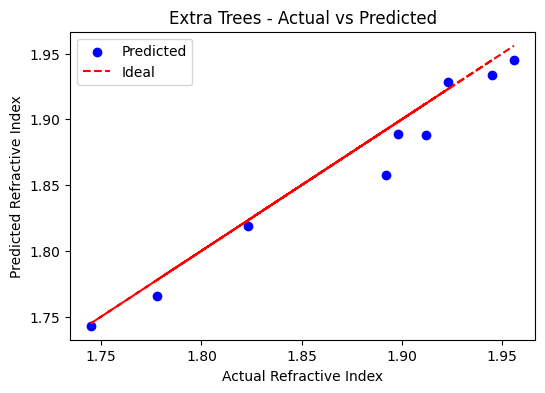

FloatText(value=5.2, description='Density:')

Output()

In [15]:
# =============================================
# 📌 Predict Refractive Index from Density(using )
# =============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display

# Load dataset
df = pd.read_csv('/content/sample_data/germanatedata - Sheet1.csv')

# Features & Target
X = df[['Density (g/cm³)']]
y = df['Refractive Index']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Models
# -------------------------------
models = {}

# SVR (Linear)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr_model = SVR(kernel='linear').fit(X_train_scaled, y_train)
models["SVR (Linear)"] = (svr_model, X_test_scaled)

# Polynomial Regression
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression().fit(X_train_poly, y_train)
models["Polynomial Regression"] = (poly_model, X_test_poly)

# Extra Trees
extra_model = ExtraTreesRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
models["Extra Trees"] = (extra_model, X_test)

# -------------------------------
# Evaluation
# -------------------------------
for name, (model, X_t) in models.items():
    y_pred = model.predict(X_t)
    print(f"\n🔹 {name}")
    print(f"R² Score       : {r2_score(y_test, y_pred):.4f}")
    print(f"MAE            : {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"RMSE           : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

    # Plot
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, color='blue', label="Predicted")
    plt.plot(y_test, y_test, color='red', linestyle='--', label="Ideal")
    plt.xlabel("Actual Refractive Index")
    plt.ylabel("Predicted Refractive Index")
    plt.title(f"{name} - Actual vs Predicted")
    plt.legend()
    plt.show()

# -------------------------------
# Interactive Prediction
# -------------------------------
# -------------------------------
# Interactive Prediction
# -------------------------------
def predict_refractive(density_val):
    input_df = pd.DataFrame([[density_val]], columns=["Density (g/cm³)"])
    input_scaled = scaler.transform(input_df)
    input_poly = poly.transform(input_df)

    print(f"\n📌 Predictions for Density = {density_val} g/cm³")
    print("SVR (Linear)            →", svr_model.predict(input_scaled)[0])
    print("Polynomial Regression   →", poly_model.predict(input_poly)[0])
    print("Extra Trees             →", extra_model.predict(input_df)[0])

density_input = widgets.FloatText(value=5.2, description='Density:')
display(density_input)

widgets.interactive_output(predict_refractive, {'density_val': density_input})



🔹 SVR (Linear)
R² Score       : 0.9923
MAE            : 0.0415
RMSE           : 0.0489


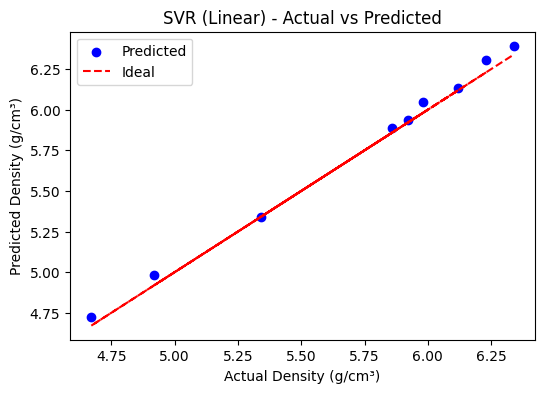


🔹 Polynomial Regression
R² Score       : 0.9839
MAE            : 0.0629
RMSE           : 0.0709


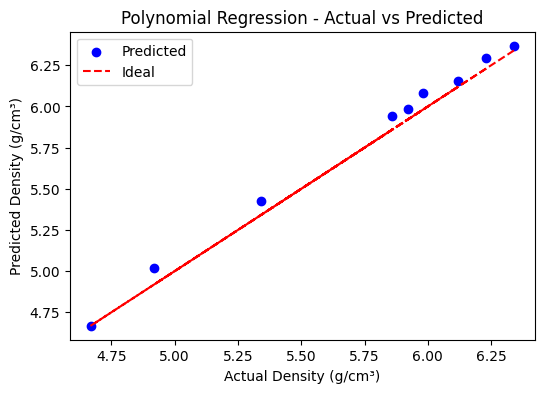


🔹 Extra Trees
R² Score       : 0.9787
MAE            : 0.0625
RMSE           : 0.0817


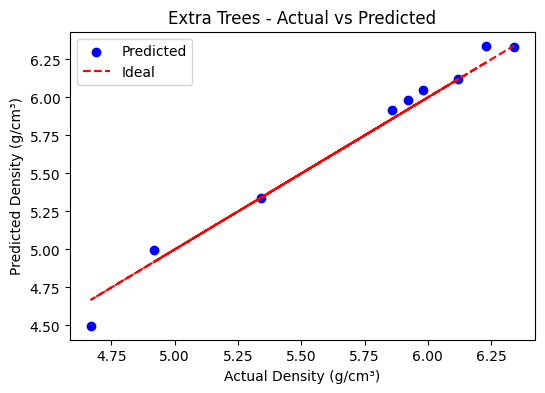

FloatText(value=1.8, description='Refractive Index:')

Output()

In [16]:
# =============================================
# 📌 Predict Density from Refractive Index
# =============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display

# Load dataset
df = pd.read_csv('/content/sample_data/germanatedata - Sheet1.csv')

# Features & Target (reversed)
X = df[['Refractive Index']]
y = df['Density (g/cm³)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Models
# -------------------------------
models = {}

# SVR (Linear)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr_model = SVR(kernel='linear').fit(X_train_scaled, y_train)
models["SVR (Linear)"] = (svr_model, X_test_scaled)

# Polynomial Regression
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression().fit(X_train_poly, y_train)
models["Polynomial Regression"] = (poly_model, X_test_poly)

# Extra Trees
extra_model = ExtraTreesRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
models["Extra Trees"] = (extra_model, X_test)

# -------------------------------
# Evaluation
# -------------------------------
for name, (model, X_t) in models.items():
    y_pred = model.predict(X_t)
    print(f"\n🔹 {name}")
    print(f"R² Score       : {r2_score(y_test, y_pred):.4f}")
    print(f"MAE            : {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"RMSE           : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

    # Plot
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, color='blue', label="Predicted")
    plt.plot(y_test, y_test, color='red', linestyle='--', label="Ideal")
    plt.xlabel("Actual Density (g/cm³)")
    plt.ylabel("Predicted Density (g/cm³)")
    plt.title(f"{name} - Actual vs Predicted")
    plt.legend()
    plt.show()

# -------------------------------
# Interactive Prediction
# -------------------------------
def predict_density(refractive_val):
    input_df = pd.DataFrame([[refractive_val]], columns=["Refractive Index"])
    input_scaled = scaler.transform(input_df)
    input_poly = poly.transform(input_df)

    print(f"\n📌 Predictions for Refractive Index = {refractive_val}")
    print("SVR (Linear)            →", svr_model.predict(input_scaled)[0])
    print("Polynomial Regression   →", poly_model.predict(input_poly)[0])
    print("Extra Trees             →", extra_model.predict(input_df)[0])  # ✅ Fixed

refractive_input = widgets.FloatText(value=1.8, description='Refractive Index:')
display(refractive_input)

widgets.interactive_output(predict_density, {'refractive_val': refractive_input})


In [17]:
!pip install catboost

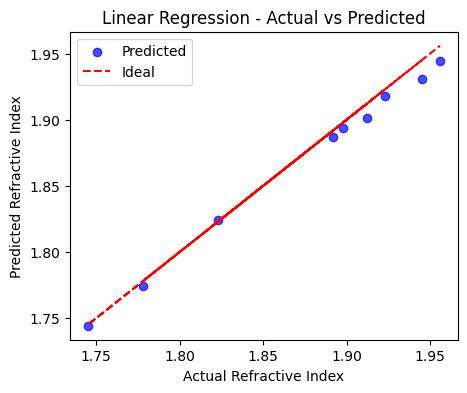

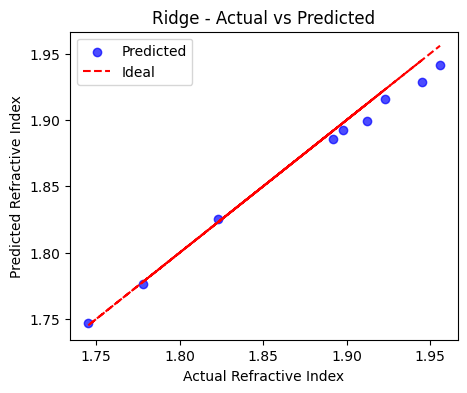

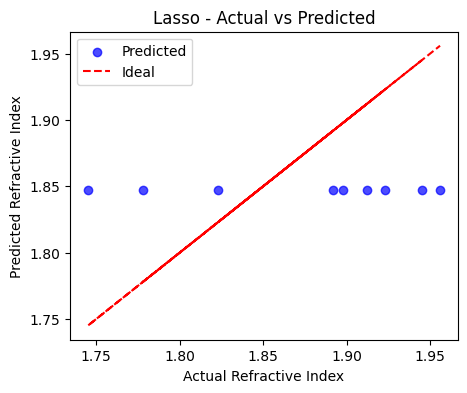

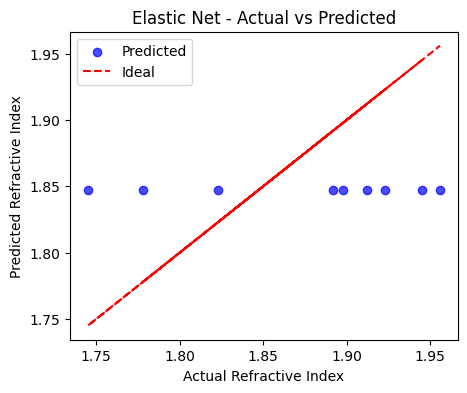

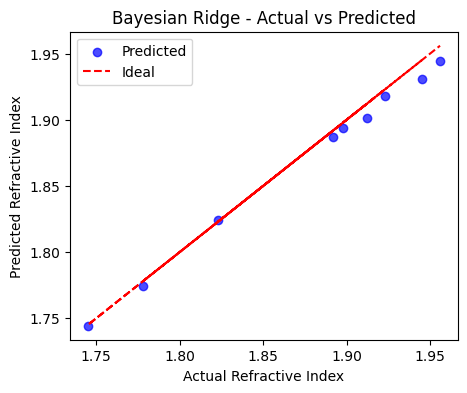

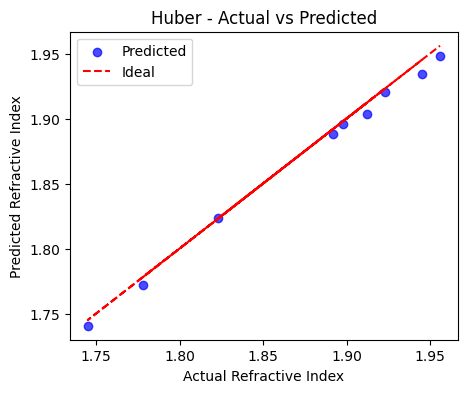

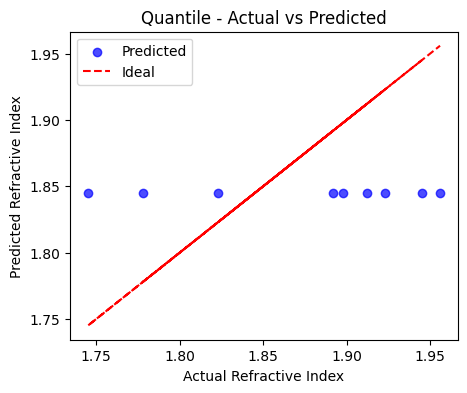

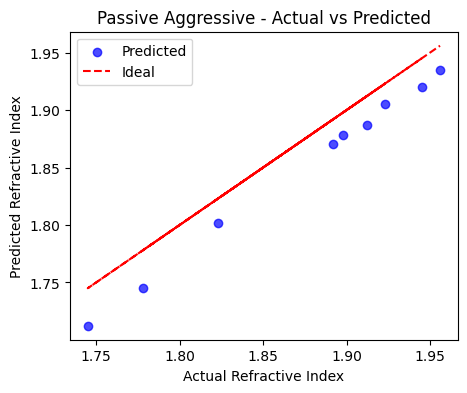

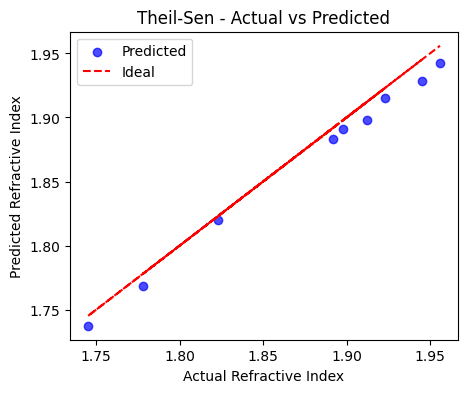

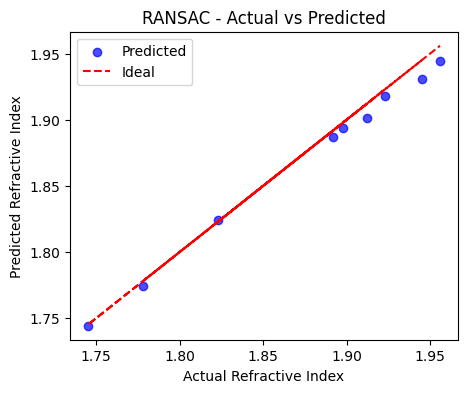

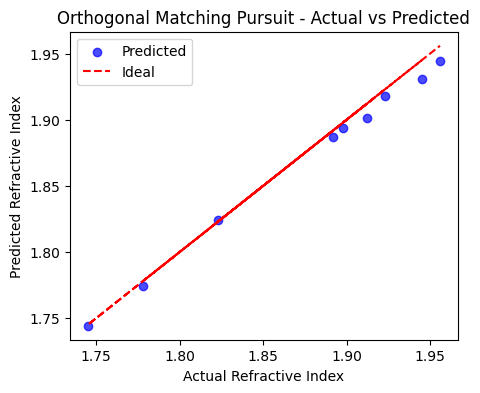

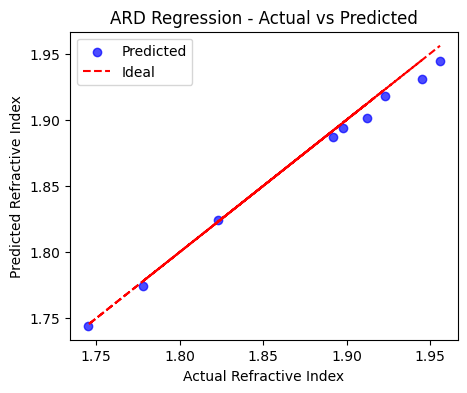

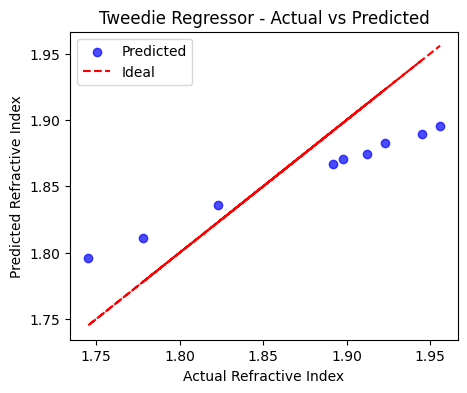

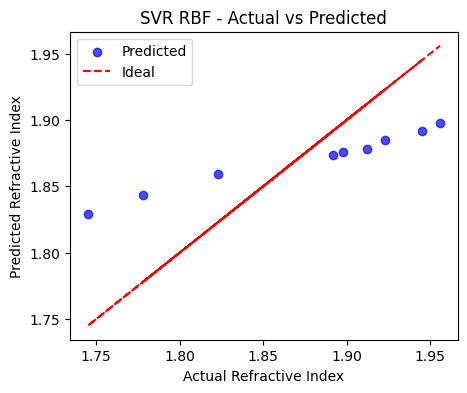

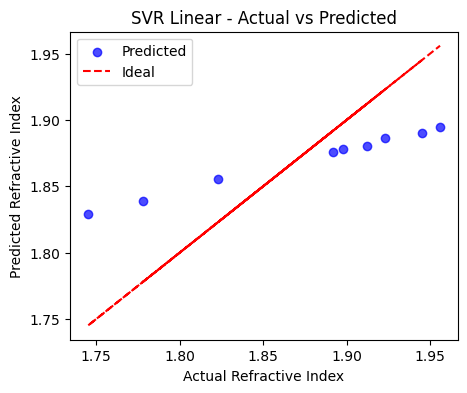

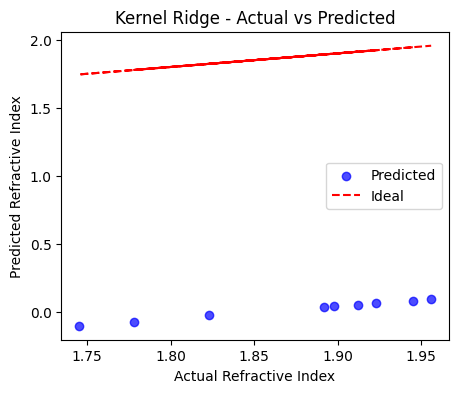

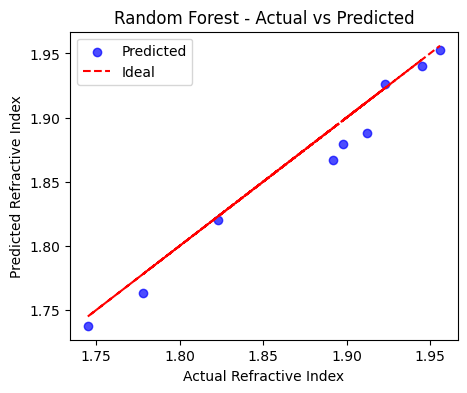

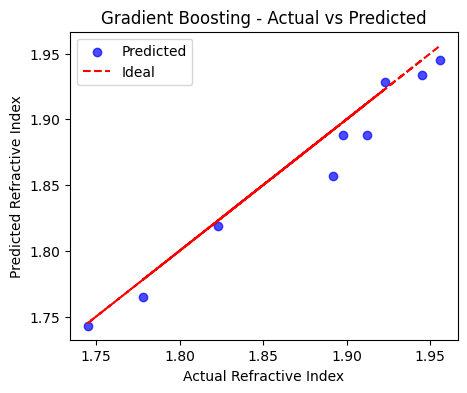

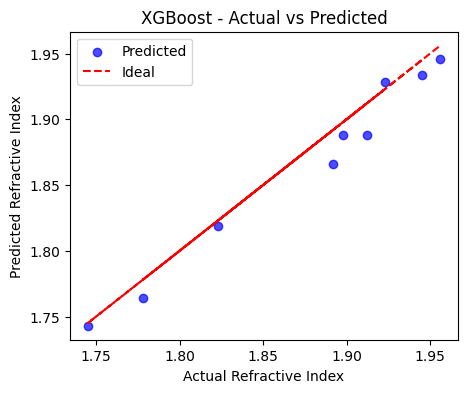

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 33, number of used features: 0
[LightGBM] [Info] Start training from score 1.847424
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM

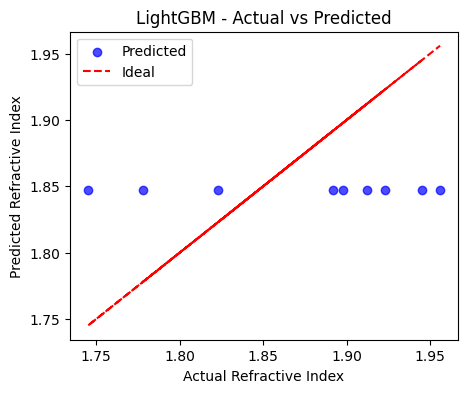

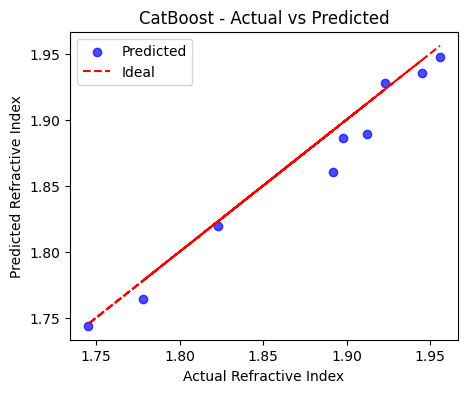

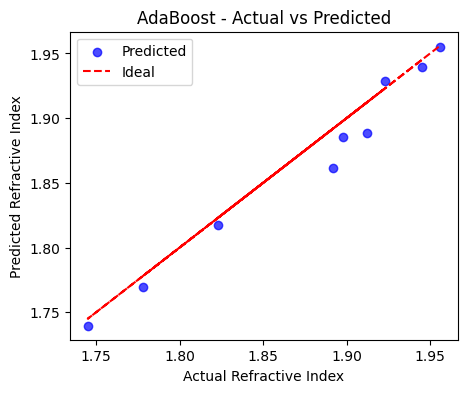

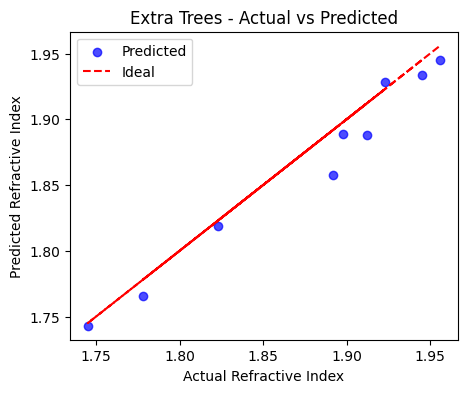

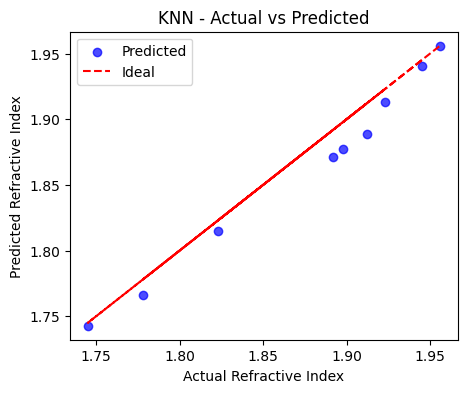

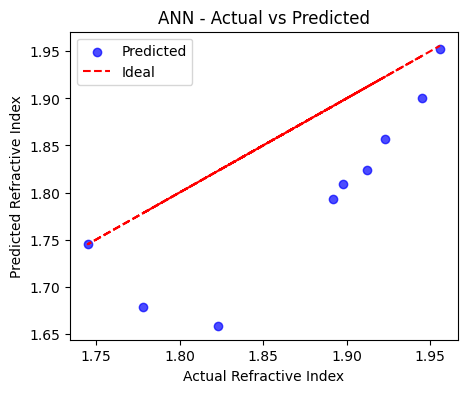

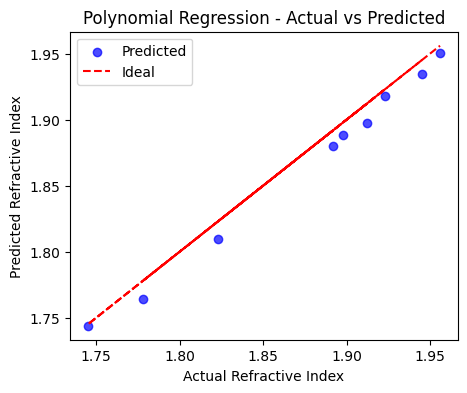

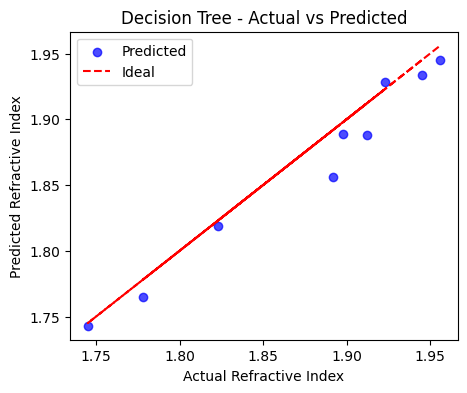

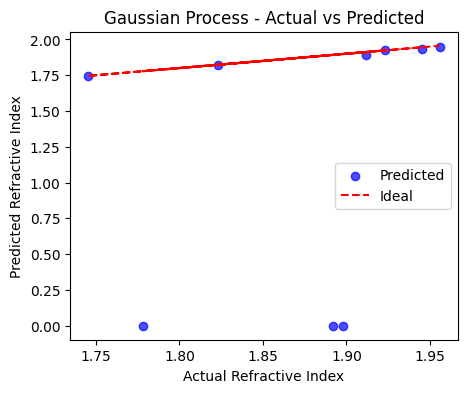


📊 Benchmark Results for Tellurite Data:

                          Model          R²       MAE      RMSE
0             Linear Regression    0.988105  0.006309  0.007709
1                         Ridge    0.982903  0.007605  0.009242
2                         Lasso   -0.148549  0.070859  0.075751
3                   Elastic Net   -0.148549  0.070859  0.075751
4                Bayesian Ridge    0.987947  0.006337  0.007760
5                         Huber    0.992208  0.005336  0.006239
6                      Quantile   -0.176163  0.071667  0.076656
7            Passive Aggressive    0.878633  0.024104  0.024624
8                     Theil-Sen    0.977813  0.009799  0.010528
9                        RANSAC    0.988105  0.006309  0.007709
10  Orthogonal Matching Pursuit    0.988105  0.006309  0.007709
11               ARD Regression    0.987947  0.006337  0.007760
12            Tweedie Regressor    0.666998  0.038090  0.040788
13                      SVR RBF    0.501895  0.045584  0.04988

In [18]:
# =============================================
# 📌 Regression Benchmark for Germanate Dataset
# =============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression Models
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor,
                                  QuantileRegressor, PassiveAggressiveRegressor, TheilSenRegressor, RANSACRegressor,
                                  OrthogonalMatchingPursuit, ARDRegression, TweedieRegressor)
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Load dataset
df = pd.read_csv("/content/sample_data/germanatedata - Sheet1.csv")

# Features & Target
X = df[['Density (g/cm³)']]
y = df['Refractive Index']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge(),
    "Huber": HuberRegressor(),
    "Quantile": QuantileRegressor(solver="highs"),
    "Passive Aggressive": PassiveAggressiveRegressor(max_iter=1000, tol=1e-3),
    "Theil-Sen": TheilSenRegressor(),
    "RANSAC": RANSACRegressor(),
    "Orthogonal Matching Pursuit": OrthogonalMatchingPursuit(),
    "ARD Regression": ARDRegression(),
    "Tweedie Regressor": TweedieRegressor(),
    "SVR RBF": SVR(kernel='rbf'),
    "SVR Linear": SVR(kernel='linear'),
    "Kernel Ridge": KernelRidge(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror"),
    "LightGBM": lgb.LGBMRegressor(),
    "CatBoost": cb.CatBoostRegressor(verbose=0),
    "AdaBoost": AdaBoostRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "KNN": KNeighborsRegressor(),
    "ANN": MLPRegressor(max_iter=2000),
    "Polynomial Regression": LinearRegression().fit(X_train_poly, y_train),
    "Decision Tree": DecisionTreeRegressor(),
    "Gaussian Process": GaussianProcessRegressor(kernel=RBF())
}

# Results storage
results = []

# Train & Evaluate
for name, model in models.items():
    if name == "Polynomial Regression":
        y_pred = model.predict(X_test_poly)
    elif "SVR" in name or "Kernel Ridge" in name or name in ["Ridge","Lasso","Elastic Net","Bayesian Ridge","Huber","Quantile","Passive Aggressive","Theil-Sen","RANSAC","Orthogonal Matching Pursuit","ARD Regression","Tweedie Regressor","ANN","Gaussian Process"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results.append([name,
                    r2_score(y_test, y_pred),
                    mean_absolute_error(y_test, y_pred),
                    np.sqrt(mean_squared_error(y_test, y_pred))])

    # Plot
    plt.figure(figsize=(5,4))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label="Predicted")
    plt.plot(y_test, y_test, color='red', linestyle='--', label="Ideal")
    plt.xlabel("Actual Refractive Index")
    plt.ylabel("Predicted Refractive Index")
    plt.title(f"{name} - Actual vs Predicted")
    plt.legend()
    plt.show()

# Results Table
results_df = pd.DataFrame(results, columns=["Model", "R²", "MAE", "RMSE"])
print("\n📊 Benchmark Results for Tellurite Data:\n")
print(results_df)